<a href="https://colab.research.google.com/github/Abijith2904/abijithvh.github.io/blob/main/projectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

base_path = "/content/drive/MyDrive/UNSW_Extracted/CSV Files/Training and Testing Sets"

os.listdir(base_path)

['UNSW_NB15_testing-set.csv', 'UNSW_NB15_training-set.csv']

In [9]:
train_path = "/content/drive/MyDrive/UNSW_Extracted/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv"

test_path = "/content/drive/MyDrive/UNSW_Extracted/CSV Files/Training and Testing Sets/UNSW_NB15_testing-set.csv"

import pandas as pd

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Training shape:", train.shape)
print("Testing shape:", test.shape)

Training shape: (175341, 45)
Testing shape: (82332, 45)


In [10]:
X_train = train.drop(['attack_cat','label'], axis=1)
y_train = train['attack_cat']

X_test = test.drop(['attack_cat','label'], axis=1)
y_test = test['attack_cat']

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))

In [12]:
import pandas as pd

# Ensure 'id' column is removed if it exists, before defining X_train and X_test
# This step should ideally be before get_dummies, but performing it here ensures X_train/X_test are clean.
if 'id' in train.columns:
    train.drop(['id'], axis=1, inplace=True)
if 'id' in test.columns:
    test.drop(['id'], axis=1, inplace=True)

# Re-apply get_dummies to ensure categorical columns are handled in case of out-of-order execution.
# This might be redundant if cell -UNtxEu4kjUt ran correctly, but ensures X_train/X_test are numerical.
categorical_cols = ['proto','service','state']
train = pd.get_dummies(train, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)
train, test = train.align(test, join='left', axis=1, fill_value=0)

# Re-define X_train and X_test from the processed 'train' and 'test' DataFrames
X_train = train.drop(['attack_cat','label'], axis=1)
X_test = test.drop(['attack_cat','label'], axis=1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5273 - loss: 1.3031 - val_accuracy: 0.0084 - val_loss: 5.1897
Epoch 2/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6172 - loss: 0.9508 - val_accuracy: 0.0090 - val_loss: 4.7786
Epoch 3/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6319 - loss: 0.9044 - val_accuracy: 0.0250 - val_loss: 4.4958
Epoch 4/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6410 - loss: 0.8743 - val_accuracy: 0.0889 - val_loss: 3.9689
Epoch 5/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6468 - loss: 0.8610 - val_accuracy: 0.0770 - val_loss: 3.9422
Epoch 6/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6485 - loss: 0.8525 - val_accuracy: 0.0971 - val_loss: 3.9221
Epoch 7/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6503 - loss: 0.8464 - val_accuracy: 0.1021 - val_loss: 3.7104
Epoch 8/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6534 - loss: 0.8393 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5945 - loss: 1.0655 - val_accuracy: 0.0090 - val_loss: 4.3237
Epoch 2/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6477 - loss: 0.8728 - val_accuracy: 0.0114 - val_loss: 4.0408
Epoch 3/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6579 - loss: 0.8373 - val_accuracy: 0.0924 - val_loss: 3.0245
Epoch 4/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6640 - loss: 0.8195 - val_accuracy: 0.0158 - val_loss: 4.1674
Epoch 5/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6697 - loss: 0.8008 - val_accuracy: 0.0400 - val_loss: 4.1018
Epoch 6/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6725 - loss: 0.7934 - val_accuracy: 0.0276 - val_loss: 3.6939
Epoch 7/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6748 - loss: 0.7857 - val_accuracy: 0.1782 - val_loss: 2.9832
Epoch 8/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6778 - loss: 0.7780 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5505 - loss: 1.1944 - val_accuracy: 0.0088 - val_loss: 5.1989
Epoch 2/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6320 - loss: 0.9045 - val_accuracy: 0.0172 - val_loss: 4.4681
Epoch 3/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6468 - loss: 0.8679 - val_accuracy: 0.0791 - val_loss: 3.9696
Epoch 4/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6518 - loss: 0.8466 - val_accuracy: 0.0867 - val_loss: 3.7408
Epoch 5/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6572 - loss: 0.8304 - val_accuracy: 0.1101 - val_loss: 3.4028
Epoch 6/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6619 - loss: 0.8201 - val_accuracy: 0.1400 - val_loss: 3.3211
Epoch 7/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6613 - loss: 0.8165 - val_accuracy: 0.1577 - val_loss: 3.0196
Epoch 8/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6647 - loss: 0

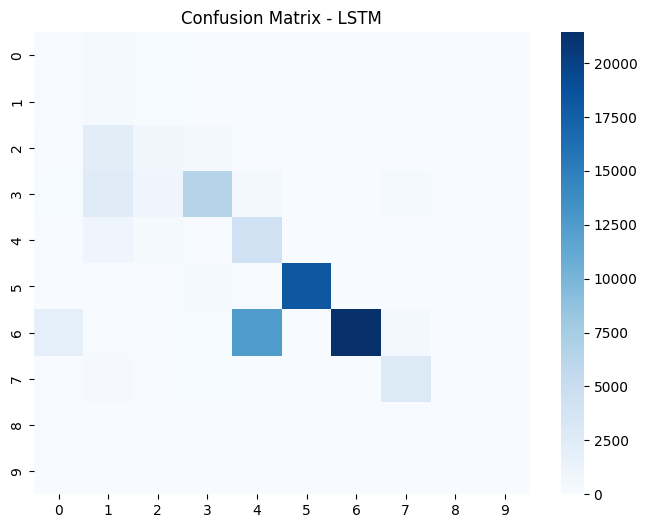

Model Saved Successfully to Google Drive


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
import pickle

# Define paths for data loading (assuming these paths are defined earlier or are constants)
train_path = "/content/drive/MyDrive/UNSW_Extracted/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv"
test_path = "/content/drive/MyDrive/UNSW_Extracted/CSV Files/Training and Testing Sets/UNSW_NB15_testing-set.csv"

# Reload data to ensure original columns are present
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# ===============================
# REMOVE ID COLUMN
# ===============================
if 'id' in train.columns:
    train.drop(['id'], axis=1, inplace=True)
    test.drop(['id'], axis=1, inplace=True)

# ===============================
# ENCODE CATEGORICAL FEATURES
# ===============================
categorical_cols = ['proto','service','state']

train = pd.get_dummies(train, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

train, test = train.align(test, join='left', axis=1, fill_value=0)

# ===============================
# DEFINE FEATURES & TARGET
# ===============================
X_train = train.drop(['attack_cat','label'], axis=1)
y_train = train['attack_cat']

X_test = test.drop(['attack_cat','label'], axis=1)
y_test = test['attack_cat']

# ===============================
# LABEL ENCODING
# ===============================
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))

# ===============================
# SCALING
# ===============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# SMOTE BALANCING
# ===============================
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# ===============================
# ONE HOT ENCODE TARGET
# ===============================
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ===============================
# MODEL 1 — DNN
# ===============================
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

dnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

dnn_model.fit(X_train, y_train_cat,
              epochs=15,
              batch_size=256,
              validation_split=0.2,
              verbose=1)

dnn_pred = np.argmax(dnn_model.predict(X_test), axis=1)
dnn_acc = accuracy_score(y_test, dnn_pred)

print("DNN Accuracy:", dnn_acc)

# ===============================
# MODEL 2 — CNN
# ===============================
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1],1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train_cat,
              epochs=15,
              batch_size=256,
              validation_split=0.2,
              verbose=1)

cnn_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
cnn_acc = accuracy_score(y_test, cnn_pred)

print("CNN Accuracy:", cnn_acc)

# ===============================
# MODEL 3 — LSTM
# ===============================
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

lstm_model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

lstm_model.fit(X_train_lstm, y_train_cat,
               epochs=15,
               batch_size=256,
               validation_split=0.2,
               verbose=1)

lstm_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
lstm_acc = accuracy_score(y_test, lstm_pred)

print("LSTM Accuracy:", lstm_acc)

# ===============================
# CONFUSION MATRIX (Best Model)
# ===============================
best_pred = lstm_pred

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix - LSTM")
plt.show()

# ===============================
# SAVE BEST MODEL TO DRIVE
# ===============================
model_path = '/content/drive/MyDrive/IDS_Project/ids_model.h5'
scaler_path = '/content/drive/MyDrive/IDS_Project/scaler.pkl'
encoder_path = '/content/drive/MyDrive/IDS_Project/label_encoder.pkl'

lstm_model.save(model_path)
pickle.dump(scaler, open(scaler_path,'wb'))
pickle.dump(le, open(encoder_path,'wb'))

print("Model Saved Successfully to Google Drive")

In [17]:
print("Classification Report (LSTM):\n")
print(classification_report(y_test, lstm_pred, target_names=le.classes_))

Classification Report (LSTM):

                precision    recall  f1-score   support

      Analysis       0.01      0.02      0.01       677
      Backdoor       0.05      0.64      0.10       583
           DoS       0.30      0.21      0.25      4089
      Exploits       0.81      0.58      0.67     11132
       Fuzzers       0.25      0.73      0.37      6062
       Generic       1.00      0.96      0.98     18871
        Normal       1.00      0.58      0.73     37000
Reconnaissance       0.73      0.83      0.78      3496
     Shellcode       0.56      0.29      0.38       378
         Worms       1.00      0.05      0.09        44

      accuracy                           0.66     82332
     macro avg       0.57      0.49      0.44     82332
  weighted avg       0.85      0.66      0.72     82332



In [18]:
history = lstm_model.fit(X_train_lstm, y_train_cat,
                         epochs=15,
                         batch_size=256,
                         validation_split=0.2,
                         verbose=1)

Epoch 1/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6760 - loss: 0.7792 - val_accuracy: 0.2875 - val_loss: 2.5875
Epoch 2/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6764 - loss: 0.7779 - val_accuracy: 0.2558 - val_loss: 2.6551
Epoch 3/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6786 - loss: 0.7736 - val_accuracy: 0.2440 - val_loss: 2.7139
Epoch 4/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6786 - loss: 0.7753 - val_accuracy: 0.3140 - val_loss: 2.4165
Epoch 5/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6788 - loss: 0.7726 - val_accuracy: 0.2740 - val_loss: 2.6503
Epoch 6/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6796 - loss: 0.7715 - val_accuracy: 0.2424 - val_loss: 2.5138
Epoch 7/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6802 - loss: 0.7694 - val_accuracy: 0.2361 - val_loss: 2.5632
Epoch 8/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6816 - loss: 0

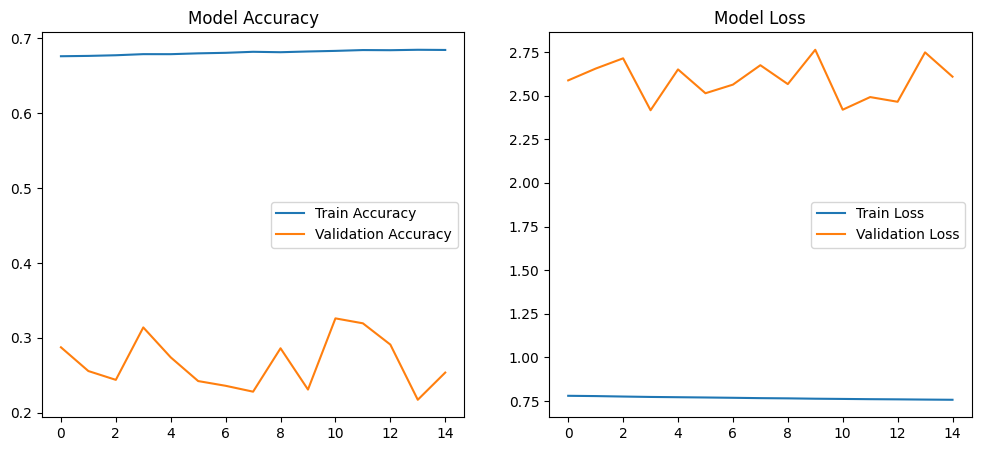

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


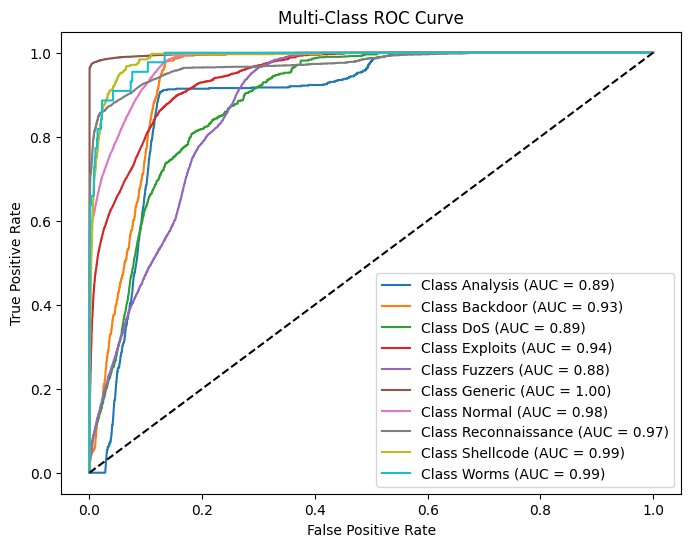

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=range(num_classes))
y_pred_prob = lstm_model.predict(X_test_lstm)

plt.figure(figsize=(8,6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {le.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

In [21]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["DNN", "CNN", "LSTM"],
    "Accuracy": [dnn_acc, cnn_acc, lstm_acc]
})

print(comparison)

  Model  Accuracy
0   DNN  0.673687
1   CNN  0.657557
2  LSTM  0.664930


In [22]:
sample = X_test_lstm[0].reshape(1,1,X_test.shape[1])
prediction = lstm_model.predict(sample)
predicted_class = le.inverse_transform([np.argmax(prediction)])

print("Predicted Attack Type:", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Attack Type: Fuzzers
